## Condensate Fraction

In this notebook we find the condensate fraction of non-relativistic superfluids as function of their temperature and interaction strength. This notebook uses much of the same results that are used in the Superfluid Dark Matter notebook and should read as a follow-up to that. This notebook also refers to results used in this [Paper](https://arxiv.org/pdf/1809.08286.pdf).

In [79]:
#%matplotlib notebook
import numpy as np
import mpmath
import math
import scipy.integrate as integrate
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.optimize import fsolve

%matplotlib inline

We fix the particle mass and the number density. This is unlike the previous notebook in which we used a particular interaction strength and temperature and allowed the number density to be a variable. This is because we are now interested in getting a better understanding of superfluids and we coonsider the case where we have a fixed number of particles.

In [80]:
m = 0.5

rho = 10**(-9.0)


def a(g,m):
    return m*g/(4.0*math.pi)
def y(rho,g,m):
    return rho**(1.0/3.0)*a(g,m)

def s2(n1,sigma,rho,g,m):
    return 4.0*math.pi*a(g,m)*rho**(1.0/3.0)*(1.0-n1+sigma)

We now initialize empty lists to which we will be appending our results.

In [89]:
rho1list =[];
#rho2alist =[];
rho2blist =[];
rholist =[];
pressure1list = [];
#pressure2list =[];
#pressure2alist =[];
#pressure2blist=[];

condfraclist = [];
condfraclist_temp = [];

superfraclist = [];
superfraclist_temp = [];
#normalfraclist = [];
r =[];
r = np.zeros(2)
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step
T1_list = [];
Tlist_temp = [];
Tlist = [];
rho2 = [];
g1_list = [];
glist_temp = [];
glist = [];

This is the theoretical critical temperature that we get from the mean field theory. This is applicable in the limit of weak interactions. Of course, when the interactions become strong, our result is not reliable because the mass term in the Lagrangian is overshadowed by the interaction term. In that case, the renomrlaization scheme used by us in 

In [90]:
critical_temp = (rho**0.66666)*3.35/m 
print (critical_temp)

6.700925703151215e-06


Now we solve the coupled implicit equations (47). First we shall loop over a range of temperature values and subsequently we will go over a range of intercation strengths for each of those temperatures. 

In [91]:
T1_list = np.linspace(6.5*10**(-6.0), 10**(-8.0), 20)
g1_list = np.linspace(100, 14000, 20)


for j in my_range(0,19,1):
    g = g1_list[j]
    condfraclist_temp = [];
    Tlist_temp = [];
    glist_temp = [];
    for i in my_range(0,19,1):

        t = T1_list[i]

        def equations2(r):
            n1 = r[0]
            sigma = r[1]
            f = np.zeros(2)
            f[0] = n1 - (s2(n1,sigma,rho,g,m)**(3.0/2.0))/(3.0*math.pi*math.pi)*(1.0 + (3.0/(2.0*math.sqrt(2.0))) *integrate.quad(lambda x: math.sqrt(math.sqrt(1.0+x**2.0)-1.0)*((1.0/np.tanh(s2(n1,sigma,rho,g,m)*x*rho**(2.0/3.0)/(2.0*t*m)))-1.0),0.0, 100.0*(20.0*t*m/(s2(n1,sigma,rho,g,m) *rho**(2.0/3.0) )) )[0])
            f[1] = sigma - (2.0*s2(n1,sigma,rho,g,m)/(math.pi**(1.5)))*(math.sqrt(y(rho,g,m) - y(rho,g,m)*n1)) + ((s2(n1,sigma,rho,g,m)**(3.0/2.0))/(2.0*math.sqrt(2.0)*(math.pi**2.0)) )*integrate.quad(lambda x: (math.sqrt(math.sqrt(1.0+x**2.0)-1.0)/(math.sqrt(1.0+x**2.0)) )*((1.0/np.tanh(s2(n1,sigma,rho,g,m)*x*rho**(2.0/3.0)/(2.0*t*m)))-1.0),0.0, 10.0*(20.0*t*m/(s2(n1,sigma,rho,g,m) * rho**(2.0/3.0) )) )[0]
            return f

        def pressure0(n1,sigma):
            return -(g*rho**2.0)*( ( (1.0-n1)/2.0 -1.0 -n1-sigma )*(1.0-n1)- n1**2.0 -(sigma**2.0)/2.0)

        def pressure1(n1,sigma):
            return -t*integrate.quad(lambda k: (k**2.0)*math.log(1.0- math.exp(-(math.sqrt((k**2.0)/(2.0*m) *((k**2.0)/(2.0*m) + 2.0*(rho)*(g)*(1.0-n1+sigma) ) ))/(t))),0.0, 30.0*m*math.sqrt(t) )[0]/(2.0*math.pi*math.pi)

        r = fsolve(equations2,[0.6,0.2])
        #print (r)
        #print (rho)
        #print (pressure0(r[0],r[1]))
        #print (pressure1(r[0],r[1]))
        rho1list.append(rho)
        pressure1list.append(  pressure1(r[0],r[1]) )
        condfraclist_temp.append(1-r[0])
        #n1, sigma  = r[0], r[1]
        #superfraclist_temp.append(1 - s2(n1,sigma,rho,g,m)**2.5/(6*math.sqrt(2)*math.pi**2*t)*integrate.quad(lambda x: x*(math.sqrt(1+x**2) -1 )**1.5/(math.sqrt(1+x**2)*(np.sinh(s2(n1,sigma,rho,g,m)*x/(2*t) ) )**2   )
         #                       ,0.0, 100.0*(20.0*t*m/(s2(n1,sigma,rho,g,m) *rho**(2.0/3.0) )) )[0])
        #normalfraclist.append(r[0])
        Tlist_temp.append(m*t/rho**0.6666)
        glist_temp.append(2*m**2.0*g)
        
    condfraclist.append(condfraclist_temp)
    superfraclist.append(superfraclist_temp)
    Tlist.append(Tlist_temp)
    glist.append(glist_temp)

In [92]:
T_array = np.array(Tlist)
g_array = np.array(glist)
condfracarray = np.array(condfraclist)


Now we plot the 3-d condensate fraction. For more on the interpretation of this plot, refer to the paper.

<IPython.core.display.Javascript object>


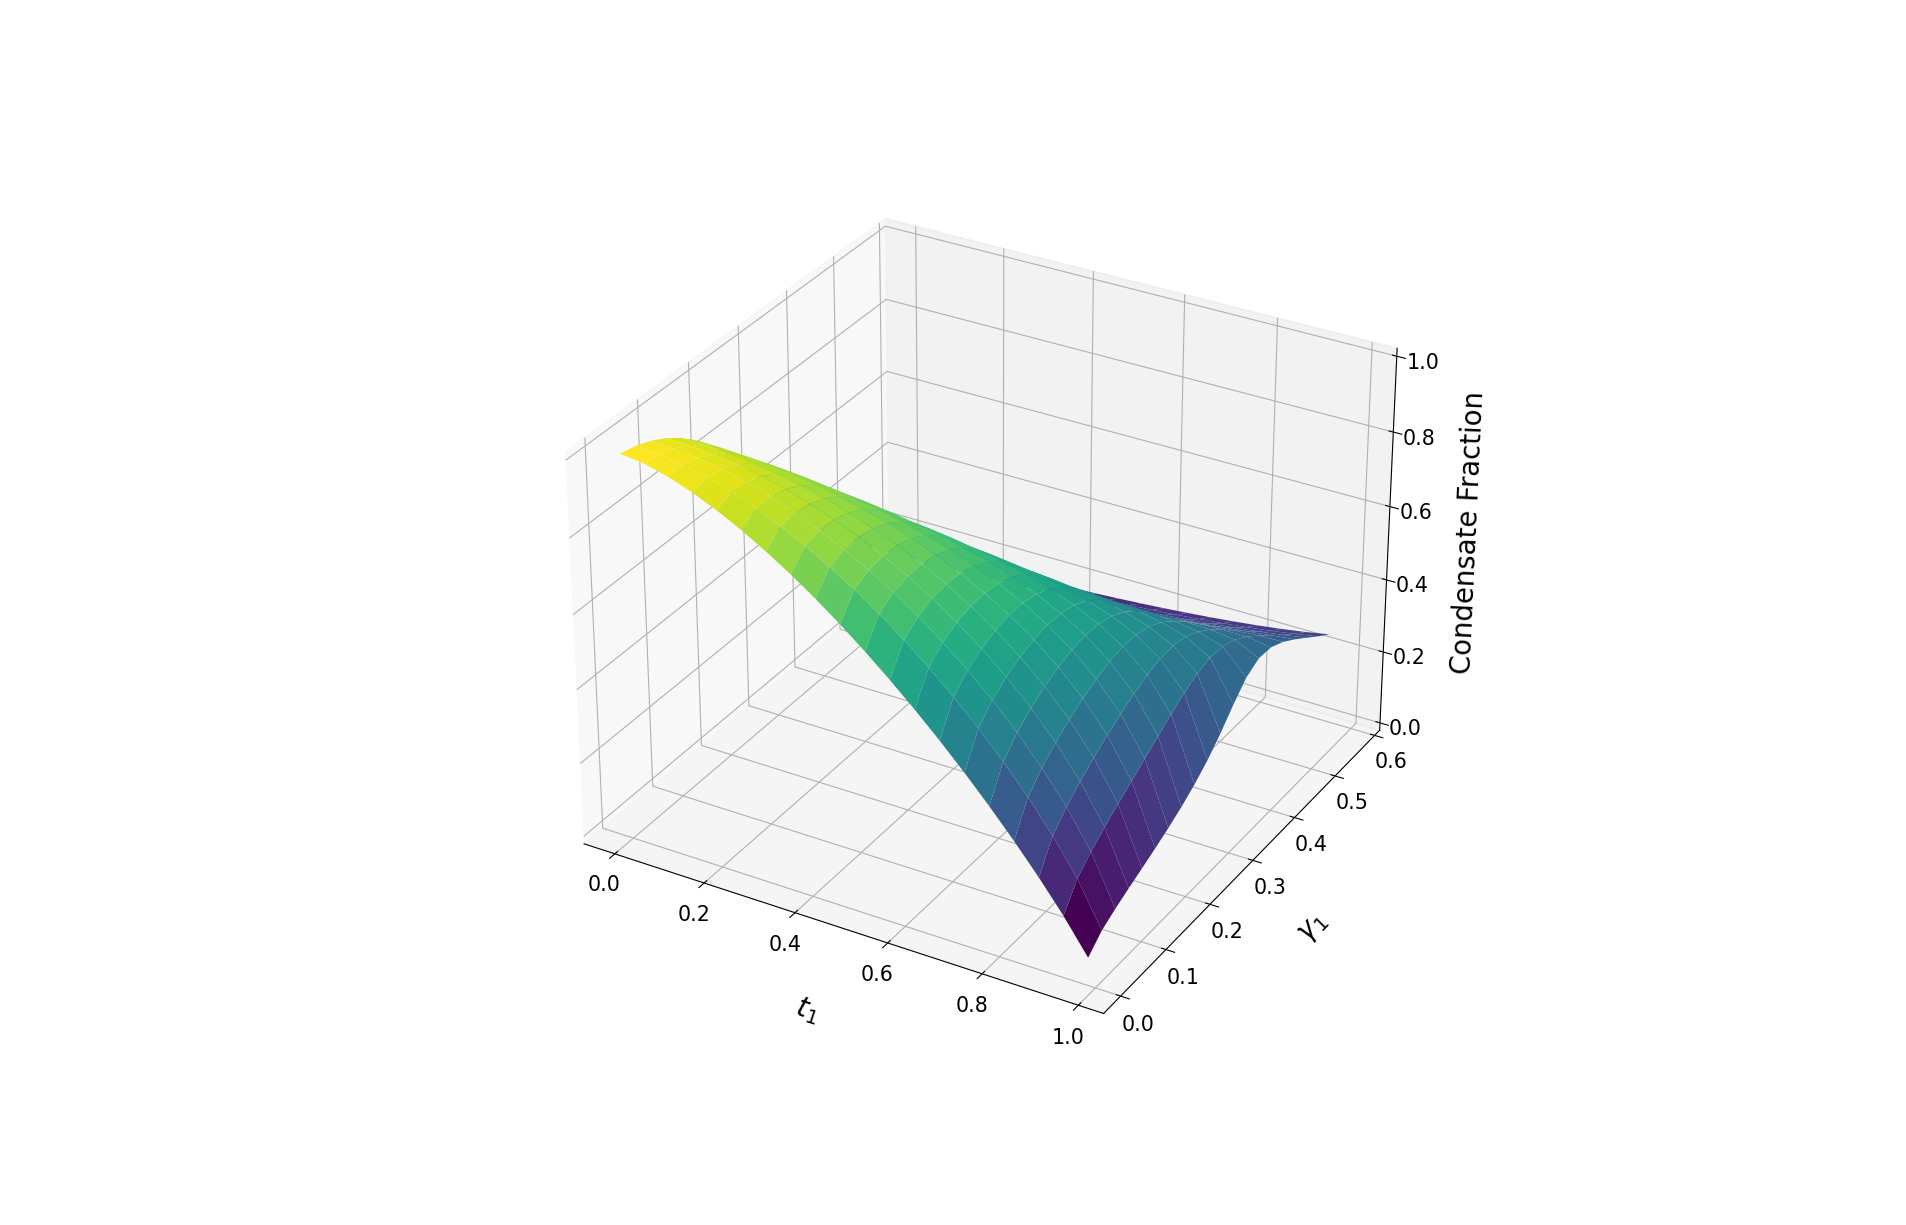

In [93]:
import seaborn as sns
%matplotlib notebook

# Creating dataset
#x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
#l = l.copy().T # transpose

#z = (np.sin(T **2) + np.cos(l **2) )
#p_array = p_array.copy().T
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(T_array/3.31, g_array*(rho**0.3333)/(8*math.pi*m), condfracarray, cmap='viridis')

ax.set_xlabel('\n $t_1$', fontsize = 20, linespacing = 3)
ax.set_ylabel('\n $\gamma_1$ ', fontsize = 20, linespacing = 3)
ax.set_zlabel('\n Condensate Fraction', fontsize = 20, linespacing = 2)
ax.set_yticks([0, 0.1,0.2,0.3,0.4, 0.5, 0.6]) 
ax.set_zticks([0, 0.2,0.4,0.6,0.8,1.0]) 
    
ax.tick_params(axis='both', which='major', labelsize=15)    
# show plot
plt.show()